## Import Modules

In [343]:
import networkx as nx # To create graph objects for drawing
import matplotlib.pyplot as plt # To draw graphs
import graphviz # To position the nodes in graphs
import math # For math!
import numpy as np # For more math!
import pandas as pd # For dataframes
import warnings # For the below
warnings.filterwarnings('ignore') # Dataframes can get noisy, so we're suppressing their warnings

## Code to Visualize Models in Dataframes

In [344]:
def visualize_dataframe(graph): # Note that this method does not CREATE nor STORE the below graphs, it just vizualizes them
  root = 0 # Set the root as node as unique ID 0, we don't technically have to do this as root will also be present in the provided graph dictionary, but without this we'd need an extra if statement
  visualization = nx.DiGraph() # Initialize the networkx graph object
  node_labels = {} # Initialize a dictionary to track the node labels, with root's label
  edge_labels = {} # Initialize a dictionary to track the edge weights
  for vertex, row in graph.iterrows(): # For each vertex (column) and row
    visualization.add_node(vertex) # Add the node to the graph obejct
    node_labels[vertex] = graph['Label'][vertex] # Add the node label to the graph object
    i = 0 # Set a counter to 0, to track columns
    for value in row[:-1]: # For all values in each row except the last (which stores the label)
      if value != 0: # If the value has a value
        visualization.add_edge(vertex,i) # Add an edge between the vertex and the counter (which represents the column)
        edge_labels[(vertex,i)] = value # Add the value to the edge labels
      i+=1
  pos = nx.nx_pydot.graphviz_layout(visualization,prog='twopi') # Define the positioning algorithm to use for the display (in this case, graphviz's twopi)
  nx.draw_networkx(visualization, pos, with_labels=False, arrowstyle='-') # Draw the base graph
  nx.draw_networkx_labels(visualization, pos, labels=node_labels) # Add node labels to the graph
  nx.draw_networkx_edge_labels(visualization, pos, edge_labels=edge_labels) # Add edge labels/weights to the graph
  pass

## Code to Validate Results

In [430]:
def validate_labels(graph):
  weights = list()
  for vertex, row in graph.iterrows(): # For each remaining vertex
    i = 0
    for value in row[:-1]:
      if value != 0:
        weights.append(int(value))
  weights.sort()
  print(f'Number of weights: {len(weights)}')
  print(f'Number of unique weights: {len(set(weights))}')
  k = int(graph['Label'].max())
  print(f'Highest label (k): {k}')

# Amalgamated Stars

## n\*3 Amalgamated Stars (n stars, 3 nodes per star)

### Storage:

The star is stored in an adjacency matrix, in the form of a dataframe.

### Graph-labeling algorithm using k-labeling

In [456]:
def label_3_star(stars):
  graph = np.zeros(((3*stars+1),(3*stars+2))) # Create an empty 2d matrix to store the graph, which is one column wider than it is tall (for the Label) | O(1)
  columns = np.arange(0,(3*stars+1)) # Create a list of columns to be used by the dataframe | O(1)
  columns = list(columns) # Convert the column to a list (to get the ability to append, basically, which numpy arrays don't have?) | O(1)
  columns.append('Label') # Append the column Label to the end of the columns list | O(1)
  graph = pd.DataFrame(graph,columns=columns) # Create a dataframe with the matrix and columns | O(1)
  graph = graph.astype(int) # Convert all values in the matrix to integers.  This is not strictly needed, but it helps with visuals. | O(1)
  root = 1 # Set the label of root | O(1)
  graph['Label'][0] = root # Add the root label to the dataframe | O(1)
  ceil_n4 = math.ceil(stars / 4.0) # Create a ceiling to space out values | O(1)
  vertex = 1 # Set a vertex counter, mostly used to keep track of which node this is in the dataframe | O(1)
  for i in range(1, stars+1): # For each star | O(stars+1)
      if i <= ceil_n4 + 1: # If the star count is less than or equal to the ceiling + 1: | O(stars)
          graph[i][0] = (root + (3 * i - 2)) # Set the weight between it and root | O(stars) we're dividing by 2 because these statements and the else statements can only happen once per run, BOTH cannot happen at the same time (even in the worst case)
          graph['Label'][i] = (3 * i - 2) # Set the label | O(stars)
      else:
          graph[i][0] = (root + (2 * ceil_n4 + i))
          graph['Label'][i] = (2 * ceil_n4 + i)
      vertex += 1 # Increase the vertex counter # | O(stars)
  for i in range(1, stars+1): # For each star | O(stars)
      for j in range(1, 3): # For each leaf of each star | O(stars*(2+1)) or, alternatively: O(star*3)
          parent = graph['Label'][i] # Set the parent to the star | O(stars*2) however, at this point in the inner loop, each command only runs twice
          if i <= ceil_n4: # Like above, if the parent is less than or equal to the ceiling: | O(stars*2)
              graph[vertex][i] = (parent + (j + 1)) # Set the leaf weight | O(stars*2)
              graph['Label'][vertex] = (j + 1) # Set the leaf label | O(stars*2)
          else:
              graph[vertex][i] = (parent + (stars + i + j - 1 - 2 * ceil_n4))
              graph['Label'][vertex] = (stars + i + j - 1 - 2 * ceil_n4)
          vertex += 1 # Increase the vertex counter by 1 | O(stars*2)
  return graph # | O(1)

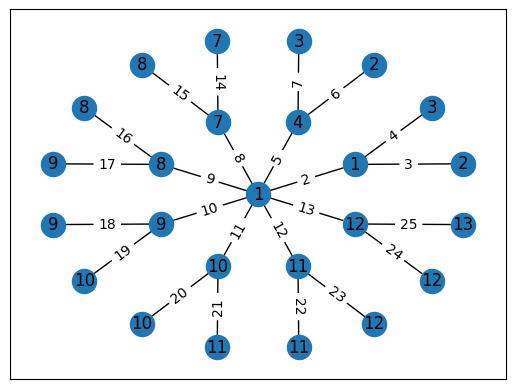

In [457]:
star_3_graph = label_3_star(8)
visualize_dataframe(star_3_graph)

In [458]:
validate_labels(star_3_graph)

Number of weights: 24
Number of unique weights: 24
Highest label (k): 13


### Design Strategy:

This algorithm is a simple Linear algorithm (it scales linearly as the nodes increase). It does not brute-force all possible combinations, it doesn't even perform any comparisons. It simply labels each weight and label according to a mathematical formula.

### Traversal:

The amalgamated star graph is traversed in preorder fashion, with all internal nodes being visited before each tree's leaves are traversed.

### Outcome Storage

Each graph is stored in a dataframe, like below:

In [ ]:
star_3_graph

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Label
0,0,2,5,8,9,10,11,12,13,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,17,0,0,0,0,0,0,0,0,8
5,0,0,0,0,0,0,0,0,0,0,...,0,18,19,0,0,0,0,0,0,9
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,20,21,0,0,0,0,10
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,22,23,0,0,11
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24,25,12
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


Each row represents a node, and each column (except for Label) shows the weight of the edge between it and its children.

### Comparison with the mathematical propery

As shown above, the maximum value of k for each of the given stars (8,3) matches the mathematically-derviced k, as found with:

```
es(Sm,3) ≥ (((m*3)+1)/2)
```

Which for a graph of 8,3 results in 13.

### Maximum Hardware Support:

In [ ]:
star_max_graph = label_3_star(13000)

On the free tier of Google Colab (which includes a VM with ~12.7 GB RAM), the star_3_label algorithm crashes at around 13000 trees/stars (39000 vertices).

### Time Complexity

This algorithm is linear, meaning it scales linearly with the input.  In this case, it is:

```
T(n) = 19*stars + 12
```

In the absolute worst case.  Since the highest order is "stars", we know that this algorithm has the order:

```
O(stars)
```

## n*m Amalgamated Stars (n stars, m nodes per star)

### Storage:

The star is stored in an adjacency matrix, in the form of a dataframe.

### Graph-labeling algorithm using k-labeling

In [460]:
def label_star(stars,nodes):
  graph = np.zeros(((stars*nodes+1),(stars*nodes+2))) # Create an empty 2d matrix to store the graph, which is one column wider than it is tall (for the Label) | O(1)
  columns = np.arange(0,(stars*nodes+1)) # Create a list of columns to be used by the dataframe | O(1)
  columns = list(columns) # Convert the column to a list (to get the ability to append, basically, which numpy arrays don't have?) | O(1)
  columns.append('Label') # Append the column Label to the end of the columns list | O(1)
  graph = pd.DataFrame(graph,columns=columns) # Create a dataframe with the matrix and columns | O(1)
  graph = graph.astype(int) # Convert all values in the matrix to integers.  This is not strictly needed, but it helps with visuals. | O(1)
  root = 1 # Set the label of root | O(1)
  vertex = 1 # Set a vertex counter, mostly used to keep track of which node this is in the dataframe | O(1)
  order = stars * nodes + 1 # Define the order of the graph | O(1)
  k = order/2 # Define k of the graph, note that we do not round yet because the rounding happens below | O(1)
  diff = k/(stars-1) # Define the difference to increase each internal node by, note that we also do not round yet | O(1)
  graph['Label'][0] = root # Add the root label to the dataframe | O(1)
  for i in range(0,stars): # For each star | O(stars+1)
    graph[vertex][0] = math.floor(1 + diff*i + root) # Set the weight between it and root by adding the difference, times i, to 1 and the root | O(stars)
    graph['Label'][vertex] = math.floor(1 + diff*i) # Set the node label adding the difference, times i, to 1 | O(stars)
    vertex += 1 # Increase the vertex counter | O(stars)
  internal = 2 # Set a counter to track internal nodes | O(1)
  for weight in range(3,order+1): # For each possible weight starting from 3 and ending at 25 (because we cannot use weight 0, so we can go up to weight 25, but we already used 1 and 2) | O((stars*nodes)-1) note that it would be +1 if we did all 24 nodes, but since we astarted at 3, we're instead only doing 23 loops (22 + end check)
    if weight != graph[internal][0]: # If the weight is not equal to the current internal weight: | O(stars*nodes)
      parent = (math.floor(((vertex-stars) + (nodes-2))/(nodes-1))) # Deterine the parent | O((stars*nodes)-(stars)) this cannot happen more than the remaining number of nodes, in fact it will happen exactly this many times (while the above can happen more than the number of remaining nodes)
      graph[vertex][parent] = weight # Set the leaf weight | O((stars*nodes)-(stars))
      graph['Label'][vertex] = weight - graph[parent][0] # Set the leaf label | O((stars*nodes)-(stars))
      vertex += 1 # Increase the vertex | O((stars*nodes)-(stars))
    else:
      internal += 1 # If the weight matches, do nothing but increase the internal vertex counter, so it can be checked later
  return graph # | O(1)

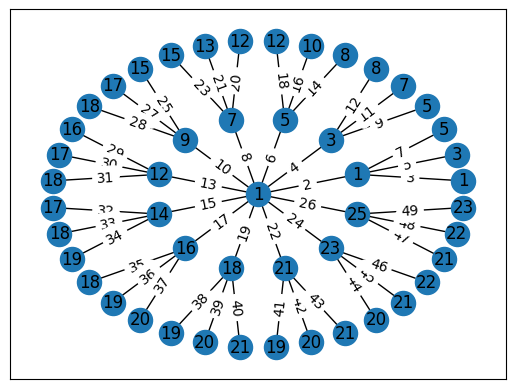

In [461]:
star_4_graph = label_star(12,4)
visualize_dataframe(star_4_graph)

In [462]:
validate_labels(star_4_graph)

Number of weights: 48
Number of unique weights: 48
Highest label (k): 25


### Design Strategy:

As with the above, this algorithm is a simple Linear algorithm (it scales linearly as the nodes increase). It does not brute-force all possible combinations, it doesn't even perform any comparisons. It simply labels each weight and label according to a mathematical formula.

### Traversal:

The amalgamated star graph is traversed in preorder fashion, with all internal nodes being visited before each tree's leaves are traversed.

### Outcome Storage

Each graph is stored in a dataframe, like below:

In [ ]:
star_4_graph

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,Label
0,0,2,4,6,8,10,13,15,17,19,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18


### Comparison with the mathematical propery

As shown above, the maximum value of k for each of the given stars (12,4) matches the mathematically-derviced k, as found with:

es(Sm,n) ≥ (((m*n)+1)/2)

Which for a graph of 12,4 results in 25.

### Maximum Hardware Support:

In [ ]:
star_max_graph = label_star(1000,35)

On the free tier of Google Colab (which includes a VM with ~12.7 GB RAM), the star_label algorithm crashes at around 1000 trees/stars by 35 nodes (35000 vertices).

### Time Complexity

This algorithm is linear, meaning it scales linearly with the input.  In this case, it is:

```
T(n) = 6(stars\*nodes) + 13
```

In the absolute worst case.  Since the highest order is "stars*nodes", we know that this algorithm has the order:

```
O(stars*nodes)
```

But, since we know that the number of edges is equal to stars*nodes, we can also say:

```
O(E)
```

# Snowflake Graphs

### Name: Snowflake

Because it looks like a snowflake.

### Formulas for calculating the graph's order and size:

The formulas for calculating the order and size of these graphs are relatively simple:

```
Order (E(G)): (triangles * nodes) + (triangles * (nodes - 2))
```

Or, as we are mainly looking at graphs with each triangle (let's just call them "triangles" for simplicity's sake) containing 3 nodes:

```
Order (E(G)): (triangles * 3) + (triangles)
```

So a graph with 8 triangles will have 32 edges, or the same number of edges as a matching 8\*3 amalgamated star plus another 8 edges for the edges that connect each triangle's leaves.

The size of these graphs is even simpler, as it exactly matches the above amalgamated stars:

```
Size (V(G)): triangles * nodes + 1
```

Or, again:

```
Size (V(G)): triangles * 3 + 1
```

As we're simply multiplying the number of triangles by the number of nodes it has and adding 1 for the centroid.

###Storage:

The star is stored in an adjacency matrix, in the form of a dataframe.

### Graph-labeling algorithm using k-labeling

In [452]:
def funky_label_3_snowflake(triangles): # This assumes the smallest value of k is (E(G) + 1)/2)+2, because that's the smallest we could get while testing or by hand
  graph = np.zeros(((triangles*3+1),(triangles*3+2))) # Create an empty 2d matrix to store the graph, which is one column wider than it is tall (for the Label) | O(1)
  columns = np.arange(0,(triangles*3+1)) # Create a list of columns to be used by the dataframe | O(1)
  columns = list(columns) # Convert the column to a list (to get the ability to append, basically, which numpy arrays don't have?) | O(1)
  columns.append('Label') # Append the column Label to the end of the columns list | O(1)
  graph = pd.DataFrame(graph,columns=columns) # Create a dataframe with the matrix and columns | O(1)
  graph = graph.astype(int) # Convert all values in the matrix to integers.  This is not strictly needed, but it helps with visuals. | O(1)
  root = 1 # Set the label of root | O(1)
  reverse = False # Create a counter that tracks which end of the graph the current loop is iterating | O(1)
  graph['Label'][0] = root # Add the root label to the dataframe | O(1)
  order = (triangles * 3) + (triangles * (3 - 2))  # Define the order of the graph | O(1)
  largest_internal_node = ((order+1)/2) # Define the label of the largest internal node of the graph, note that we are not calling this "k" because in this algorithm, it isn't | O(1)
  diff = (largest_internal_node/(triangles-1)) # Define the difference to increase each internal node by, note that we also do not round yet | O(1)
  weights = np.arange(2,((triangles*3+triangles)+6))# Define an array of weights for the algorithm to choose from. Because it assumes k += 2, the highest weight can be 3 higher than the order. Because of how Python iterates, and how the available weights start at 2, we end up having to add 6 extra weights (to go, for examples, from 2 to 35 in an 8*3 graph) | O(1)
  weights = list(weights) # Convert the numpy array to a list, for simpler operations | O(1)
  vertex = 1 # Set a tracker to count the current vertex | O(1)
  reverse_vertex = (triangles*3) # Set a counter to track the last leaf, for iterating in reverse order
  for i in range(0,triangles): # For each triangle | O(triangles+1)
    label = math.floor(1 + diff*i) # Calculate the label, based on the weight and root | O(triangles)
    graph[vertex][0] = label + root # Set the weight between it and root | O(triangles)
    graph['Label'][vertex] = label # Set the node label | O(triangles)
    weights.remove(label+root) # Remove the weight from the weights list/array | O(triangles)
    vertex += 1 # Increase the forwaard vertex counter. Since we're visiting all the internal nodes first, this means we're doing BFS/preorder | O(triangles)
  while (vertex < reverse_vertex+1): # While the forwarding counting iterators and the reverse counting iterators do not match (keeping in mind that we increase/decrease the counters AFTER labeling each node, so we have to have a +1) | O(triangles*nodes-triangles+1)
    if reverse == False: # If the reverse flag is false, which means this iterations is counting forward | O(nodes) PLEASE NOTE: with this design, because each if/else block is roughly equal in size, we'll only be counting the complexity for the first one
      parent = (math.floor(((vertex-triangles) + (3-2))/(3-1))) # Calculate the parent for the nodes
      for outer_weight in weights: # For all of the weights currently in weights, with outer_weight being used for the weight between the two leaves: | O(nodes*(triangles*nodes+6)+1) note that because we've already removed an amount of weights = to the amount of triangles, this can loop for at most triangle*nodes+6 weights
        for inner_weight in weights[1:]: # For all of the weights, except the chosen outer_weight, to be tested as an inner_weight: | O(nodes*(triangles*nodes+6)*(triangles*nodes+5)+1)
          label = inner_weight - graph['Label'][parent] # Calculate the first leaf's label | O(nodes*(triangles*nodes+6)*(triangles*nodes+5)
          neighbor_label = outer_weight - label # Calculate the second leaf's label | O(nodes*(triangles*nodes+6)*(triangles*nodes+5)
          neighbor_parent_weight = neighbor_label + graph['Label'][parent] # Calculate the second leaf's weight (between itself and the parent, not the neighbor) | O(nodes*(triangles*nodes+6)*(triangles*nodes+5)
          if label != graph['Label'][parent] and label != 0 and neighbor_label != graph['Label'][parent] and neighbor_label != 0 and label != neighbor_label and neighbor_parent_weight in weights: # This is NASTY.  If the labels do not = each other, their parent, and 0, AND the calculated weight between the second leaf and its parent is available, then: | O(5(nodes*(triangles*nodes+6)*(triangles*nodes+5)((triangles*nodes+5)^2))
            graph['Label'][vertex] = label # Set the label for the leaf 1 | O((triangles*nodes-triangles)/2) now that we're above the above mess, each of these HIGHLY qualified statements can only run as many times as their are nodes remaining, due to the breaks below.  And since each run increases the vertex count by 2, these can only run half that number.
            graph['Label'][vertex+1] = neighbor_label # Set the label for leaf 2 | O((triangles*nodes-triangles)/2)
            graph[vertex][parent] = inner_weight # Set the weight between leaf 1 and its parent | O((triangles*nodes-triangles)/2)
            graph[vertex][vertex+1] = outer_weight # Set the weight between leaf 1 and leaf 2 | O((triangles*nodes-triangles)/2)
            graph[vertex+1][parent] = neighbor_parent_weight # Set the weight between leaf 2 and its parent | O((triangles*nodes-triangles)/2)
            weights.remove(outer_weight) # Remove the weight between leaf 1 and leaf 2 | O((triangles*nodes-triangles)/2)
            weights.remove(inner_weight) # Remove the weight between leaf 1 and its parent | O((triangles*nodes-triangles)/2)
            weights.remove(neighbor_parent_weight) # Remove the weight between leaf 1 and its parent |O((triangles*nodes-triangles)/2)
            reverse = True # | Set the reverse flag to True, so that the next iteration of the outer while loop will iterate the below block | O((triangles*nodes-triangles)/2)
            vertex += 2 # Because we labelled 2 nodes, increase this by 2 | O((triangles*nodes-triangles)/2)
            break # If a match was found, break out of the middle for loop (which sends us to the break below)
        else: # If a match was not found and the innermost for loop: | O(nodes*(triangles*nodes+6)
          continue # Continue the middle for loop | O(nodes*(triangles*nodes+6)
        break # If the inner for loop broke, break out of the middle for loop back to the outer while loop | O((triangles*nodes-triangles)/2)
    else:
      parent = (math.floor(((reverse_vertex-triangles) + (3-2))/(3-1)))
      for outer_weight in reversed(weights):
        if outer_weight != weights[1]:
          for inner_weight in reversed(weights[:(weights.index(outer_weight)-1)]):
            label = inner_weight - graph['Label'][parent]
            neighbor_label = outer_weight - label
            neighbor_parent_weight = neighbor_label + graph['Label'][parent]
            if label != graph['Label'][parent] and label != 0 and neighbor_label != graph['Label'][parent] and neighbor_label != 0 and label != neighbor_label and neighbor_parent_weight in weights:
              graph['Label'][reverse_vertex] = label
              graph['Label'][reverse_vertex-1] = neighbor_label
              graph[reverse_vertex][parent] = inner_weight
              graph[reverse_vertex][reverse_vertex-1] = outer_weight
              graph[reverse_vertex-1][parent] = neighbor_parent_weight
              weights.remove(inner_weight)
              weights.remove(outer_weight)
              weights.remove(neighbor_parent_weight)
              reverse = False
              reverse_vertex -= 2
              break
          else:
            continue
          break
  return graph # Return the labeled graph dataframe | O(1)

### Assignment of Labels

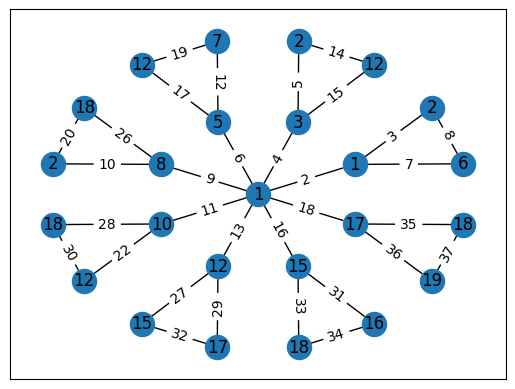

In [453]:
snowflake_graph = funky_label_3_snowflake(8)
visualize_dataframe(snowflake_graph)

In [454]:
validate_labels(snowflake_graph)

Number of weights: 32
Number of unique weights: 32
Highest label (k): 19


### Outcome Storage

Each graph is stored in a dataframe, like below:

In [455]:
snowflake_graph

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Label
0,0,2,4,6,9,11,13,16,18,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,10,0,0,0,0,0,0,0,0,8
5,0,0,0,0,0,0,0,0,0,0,...,0,28,22,0,0,0,0,0,0,10
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,27,29,0,0,0,0,12
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,33,31,0,0,15
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,36,35,17
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


# Field of Discarded Functions

In [ ]:
def generate_star(stars,nodes):
  root = 0 # Set root as node 0, please note that this is not the LABEL of root, this is the logical node ID (networkx requires distinct node IDs)
  vertex = 1 # Start a counter to set the other logical node IDs
  graph = {root:{'label':1,'nodes':{}}} # Create a mostly-empty dictionary to store the graph, with root having a label of 1
  for i in range(0,stars): # For all of the internal nodes:
    graph[root]['nodes'][vertex] = 0 # Set the node as a child of root
    graph[vertex] = {'label':0,'nodes':{}} # Create the node in the dict with a default label of 0
    parent = vertex # Set this node as the parent of the nodes below it
    for n in range(1,nodes): # For the remaining nodes in the star, aka for the children of the internal node that was just made (meaning we're doing preorder traversal):
      vertex += 1 # Increase the vertex count
      graph[parent]['nodes'][vertex] = 0 # Set the node as a child of the above parent
      graph[vertex] = {'label':0,'nodes':{}} # Create the node in the dict
    vertex += 1 # Increase the vertex count, so that the next parent node will have a unique ID
  return graph # Return the unlabelled graph

In [ ]:
def label_star_old(stars,nodes):
  order = stars * nodes + 1
  difference = math.ceil((order/2)/(stars-1))
  root = 1
  array1 = [[0,1,2]]
  array2 = []
  for i in range(1,stars):
      array1.append([
          (array1[i-1][0] + difference),
          (math.floor(array1[i-1][0] + difference)),
          (math.floor(array1[i-1][0] + difference)+1)
          ])
  h = 1
  for wt in range(3,(stars*(nodes-1))):
    j = 0
    if wt != array1[j][2]:
      array2.append([
          wt,
          (wt + array1[(math.floor((h + (nodes-2))/(nodes-1)))-1][1])
      ])
      h += 1
    else:
      j += 1
  return array1, array2

In [ ]:
stars = 12
nodes = 4
order = stars * nodes + 1
difference = math.ceil(order/2)
root = 0
array1 = [[1,2]]
for i in range(1,stars):
    array1.append([
        (math.floor(array1[i-1][0] + difference)),
        (math.floor(array1[i-1][0] + difference)+1)])
array1.append(None)
print(array1)

[[1, 2], [26, 27], [51, 52], [76, 77], [101, 102], [126, 127], [151, 152], [176, 177], [201, 202], [226, 227], [251, 252], [276, 277], None]


In [ ]:
def brute_force_label_star(stars,nodes):
  order = stars * nodes + 1
  k = math.ceil((order/2))
  root = 1
  internal_nodes = [[1,2]]
  external_nodes = []
  for star in range(1,stars):
    for label in range(1,k+1):
      weights = [x[1] for x in internal_nodes]
      if (label + 1) not in weights:
        internal_nodes.append([label,(label + 1)])
        break
  for leaf in range (0,(stars*(nodes-1))):
    parent = internal_nodes[(math.floor((leaf + (nodes-2))/(nodes-1)))-1][0]
    for label in range (1,100):
      internal_weights = [x[1] for x in internal_nodes]
      external_weights = [x[1] for x in external_nodes]
      if ((label + parent) not in internal_weights) and ((label + parent) not in external_weights):
        external_nodes.append([label,(label + parent)])
        break
  return internal_nodes, external_nodes

In [ ]:
def brute_force_label_star(stars,nodes):
  order = stars * nodes + 1
  k = math.ceil((order/2))
  root = 1
  internal_nodes = []
  external_nodes = []
  for star in range(0,stars):
    for label in range(1,100):
      weights = [x[1] for x in internal_nodes] + [y[1] for y in external_nodes]
      if (label + 1) not in weights:
        internal_nodes.append([label,(label + 1)])
        for leaf in range (0,nodes-1):
          weights = [x[1] for x in internal_nodes] + [y[1] for y in external_nodes]
          for leaf_label in range (1,100):
            if (leaf_label + label) not in weights:
              external_nodes.append([leaf_label,(leaf_label + label)])
              break
        break
  return internal_nodes, external_nodes

In [ ]:
def label_star_old(stars,nodes):
  order = stars * nodes + 1
  k = order/2
  diff = k/(stars-1)
  root = 1
  internal_nodes = []
  external_nodes = []
  for i in range(0,stars):
      internal_nodes.append([
          (math.floor(1 + diff*i)),
          (math.floor(1 + diff*i + 1))
          ])
  h = 1
  for leaf in range(3,(stars*(nodes-1))):
    j = 0
    if leaf != internal_nodes[j][1]:
      external_nodes.append([
          leaf,
          (leaf + internal_nodes[(math.floor((h + (nodes-2))/(nodes-1)))-1][1])
      ])
      h += 1
    else:
      j += 1
  return internal_nodes, external_nodes

In [ ]:
internal, external = label_star_old(8,3)
print(internal)
print(external)

[[1, 2], [2, 3], [4, 5], [6, 7], [8, 9], [9, 10], [11, 12], [13, 14]]
[[3, 5], [4, 6], [5, 8], [6, 9], [7, 12], [8, 13], [9, 16], [10, 17], [11, 20], [12, 21], [13, 23], [14, 24], [15, 27]]


In [ ]:
def visualize_star(internal_nodes,external_nodes,nodes):
  root = 0
  visualization = nx.DiGraph()
  visualization.add_node(root,label="1")
  node = 1
  vertices = {0:1}
  edges = {}
  for parent in internal_nodes:
    visualization.add_node(node)
    visualization.add_edge(root,node)
    vertices[(node)] = parent[0]
    edges[(root,node)] = parent[1]
    node += 1
  i = 1
  for leaf in external_nodes:
    parent = (math.ceil(i/(nodes-1)))
    visualization.add_node(node)
    visualization.add_edge(parent,node)
    vertices[node] = leaf[0]
    edges[(parent,node)] = leaf[1]
    i += 1
    node += 1
  pos = nx.nx_pydot.graphviz_layout(visualization,prog='twopi')
  nx.draw_networkx(visualization, pos, with_labels=False, arrowstyle='-')
  nx.draw_networkx_labels(visualization, pos, labels=vertices)
  nx.draw_networkx_edge_labels(visualization, pos, edge_labels=edges)
  return visualization

[[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [14, 15], [16, 17], [18, 19], [20, 21], [22, 23], [25, 26]]
[[2, 3], [4, 5], [6, 7], [6, 9], [8, 11], [10, 13], [9, 14], [11, 16], [13, 18], [13, 20], [15, 22], [17, 24], [16, 25], [18, 27], [19, 28], [18, 29], [19, 30], [20, 31], [18, 32], [19, 33], [20, 34], [19, 35], [20, 36], [21, 37], [20, 38], [21, 39], [22, 40], [21, 41], [22, 42], [23, 43], [22, 44], [23, 45], [24, 46], [22, 47], [23, 48], [24, 49]]


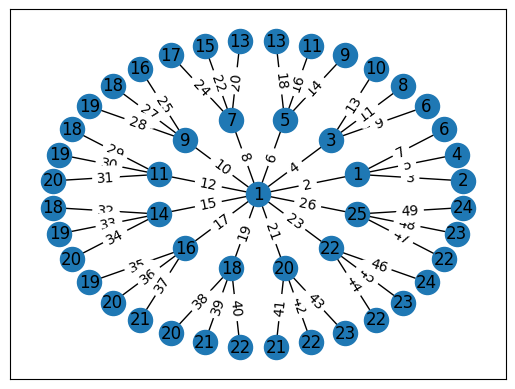

In [ ]:
internal_nodes, external_nodes = label_star(12,4)
print(internal_nodes)
print(external_nodes)

In [ ]:
def generate_snowflake(centroid,nodes):
  vertex = 1
  graph = {1:[]}
  for i in range(0,centroid):
    vertex += 1
    parent = vertex
    graph[1].append(parent)
    graph[parent] = []
    for n in range(1,nodes):
      vertex += 1
      graph[parent].append(vertex)
      if n != 1:
        graph[vertex] = [(vertex-1)]
      else:
        graph[vertex] = []
  visualization = nx.DiGraph(graph)
  pos = nx.nx_pydot.graphviz_layout(visualization,prog='twopi')
  nx.draw_networkx(visualization, pos, with_labels=False, arrowstyle='-')
  return graph

In [ ]:
def label_snowflake(graph,centroids,nodes):
  order = 100
  k = math.ceil((order/2))
  root = 1
  internal_labels = [[1,2]]
  external_labels = []
  internal_nodes = dict((k, v) for k, v in snowflake.items() if len(v) == (nodes-1))
  external_nodes = dict((k, v) for k, v in snowflake.items() if len(v) <= 1)
  for i in internal_nodes:
      internal_labels.append([
          (math.floor(internal_labels[0][0] + ((k-1)/(centroids-1))*i)),
          (math.floor(internal_labels[0][0] + ((k-1)/(centroids-1))*i+1))
          ])
  i = -1
  for leaf in external_nodes:
    i += 1
    parent_label = internal_labels[(math.floor((i + (nodes-2))/(nodes-1)))-1][0]
    for label in range (1,100):
      weights = [x[1] for x in internal_labels] + [x for x in external_labels]
      if ((label + parent_label) not in weights):
        if (len(external_nodes[leaf])) > 0:
          neighbor_label = external_labels[i-1][0]
          if ((label + neighbor_label) not in weights) and ((label + neighbor_label) != (label + parent_label)):
            external_labels.append([label,[(label + parent_label),(label+neighbor_label)]])
            break
        else:
          external_labels.append([label,[(label + parent_label)]])
          break
  return internal_labels, external_labels

In [ ]:
def label_snowflake_visualize(internal_labels,external_labels,nodes):
  root = 0
  visualization = nx.DiGraph()
  visualization.add_node(root,label="1")
  node = 1
  vertices = {0:1}
  edges = {}
  #internal_nodes = dict((k, v) for k, v in snowflake.items() if len(v) == (nodes-1))
  #external_nodes = dict((k, v) for k, v in snowflake.items() if len(v) <= 1)
  for parent in internal_labels:
    visualization.add_node(node)
    visualization.add_edge(root,node)
    vertices[(node)] = parent[0]
    edges[(root,node)] = parent[1]
    node += 1
  i = 1
  for leaf in external_labels:
    parent = (math.ceil(i/(nodes-1)))
    visualization.add_node(node)
    visualization.add_edge(parent,node)
    vertices[node] = leaf[0]
    edges[(parent,node)] = leaf[1][0]
    if (len(leaf[1])) > 1:
      neighbor = node - 1
      visualization.add_edge(neighbor,node)
      edges[(neighbor,node)] = leaf[1][1]
    i += 1
    node += 1
  pos = nx.nx_pydot.graphviz_layout(visualization,prog='twopi')
  nx.draw_networkx(visualization, pos, with_labels=False, arrowstyle='-')
  nx.draw_networkx_labels(visualization, pos, labels=vertices)
  nx.draw_networkx_edge_labels(visualization, pos, edge_labels=edges)
  return visualization

In [ ]:
def visualize_star(graph):
  root = 0
  visualization = nx.DiGraph()
  visualization.add_node(root,label="1")
  node = 1
  node_labels = {0:1}
  edge_labels = {}
  vertices=[key for key in graph.keys()]
  for vertex in vertices[1:]:
    if len(graph[vertex]['nodes']) > 0:
      visualization.add_node(vertex)
      visualization.add_edge(root,vertex)
      node_labels[vertex] = graph[vertex]['weight']
      edge_labels[(root,vertex)] = graph[root]['nodes'][vertex]
      parent = vertex
    else:
      visualization.add_node(vertex)
      visualization.add_edge(parent,vertex)
      node_labels[vertex] = graph[vertex]['weight']
      edge_labels[(parent,vertex)] = graph[parent]['nodes'][vertex]
  pos = nx.nx_pydot.graphviz_layout(visualization,prog='twopi')
  nx.draw_networkx(visualization, pos, with_labels=False, arrowstyle='-')
  nx.draw_networkx_labels(visualization, pos, labels=node_labels)
  nx.draw_networkx_edge_labels(visualization, pos, edge_labels=edge_labels)
  pass

In [ ]:
def generate_snowflake(centroids,nodes):
  root = 0 # Set root as node 0, please note that this is not the LABEL of root, this is the logical node ID (networkx requires distinct node IDs)
  vertex = 1 # Start a counter to set the other logical node IDs
  graph = {root:{'label':1,'nodes':{}}} # Create a mostly-empty dictionary to store the graph, with root having a label of 1
  for i in range(0,centroids): # For all of the internal nodes:
    graph[root]['nodes'][vertex] = 0 # Set the node as a child of root
    graph[vertex] = {'label':0,'nodes':{}} # Create the node in the dict with a default label of 0
    parent = vertex # Set this node as the parent of the nodes below it
    for n in range(1,nodes): # For the remaining nodes in the star, aka for the children of the internal node that was just made (meaning we're doing preorder traversal):
      vertex += 1 # Increase the vertex count
      graph[parent]['nodes'][vertex] = 0
      graph[vertex] = {'label':0,'nodes':{}} # Set the node as a child of the above parent
      if n != 1: # This is where this method differs from generate_star: if this is NOT the first node in the centroid (remember that node 0 is the parent), then:
        graph[vertex]['nodes'][vertex-1] = 0 # Add the node before it as a neighbor
    vertex += 1 # Increase the vertex count, so that the next parent node will have a unique ID
  return graph # Return the unlabelled graph

In [ ]:
def label_star(stars,nodes,k=None):
  graph = generate_star(stars,nodes) # Generate a graph | Should this be counted for complexity?
  if k is None: # If no k was passed (defaults to None): | O(1)
    order = (stars * nodes + 1) # | O(1)
    k = math.ceil(order/2) # We're using the optimal k for amalgamated stars as our default "lower bound" | O(1)
  else: # | O(1)
    k += 1 # If a k is passed manually (if the method recurs), try again but increase the k by 1 | O(1)
  print(f'Current k value: {k}') # | This is informational, should this be counted for complexity?
  root = 1 # Set the root label | O(1)
  i = 0 # Set a counter to be used to track the internal nodes | O(1)
  internal_weights = [] # Set an array to track the weights between root and the internal nodes (this just simplifies the comparison below in the leaf nodes, but isn't strictly needed) | O(1)
  for star in range(0,stars): # For each internal node | noting that m = stars and n = nodes, O(m)
    internal_weights.append(math.floor((1+((k-1)/(stars-1))*star))+root) # Calculate the list of the internal weights, but do NOT apply them, this is just for comparison below (so isn't strictly needed) | O(m)
  vertices=[key for key in graph.keys()] # Define a list of the vertices (we're doing this so that we can skip vertex 0, aka the root node) | O(m*n)
  try: # We're using a try/excpt to "backtrack", that is: to kill any recurrances that are not valid | O(1)
    for vertex in vertices[1:]: # For all vertices except root: | O(m*n)
      if len(graph[vertex]['nodes']) > 1: # If the node has any children, aka is an internal node: | O(m)
        graph[vertex]['label'] = (internal_weights[i] - root) # Set the label of the node based on the weight recorded in the internal_weights array (we could just do the math again, but since we already have the results, why not use them?) | O(m)
        graph[0]['nodes'][vertex] = internal_weights[i] # Set the weight of the edge in the parent of the parent node, aka root | O(m)
        i += 1 # Increase i | O(m)
        parent = vertex # Since the graph dict was made with preorder traversal, the order is always: parent1 -> child1 -> child2 -> ... childN -> parent2 -> child1 -> ... and so on, so for the next set of nodes that don't have any children (are leaf nodes), their parent is the internal node we just labelled | O(m)
      else: # If the node doesn't have any children (is a leaf) | O((m*n)-m)
        for label in range (1,k+2): # Starting at 1, check each label until we hit k+2 | O(((m*n)-m)(k+1)) (Due to the below if statement, we can never hit k+2, but python needs the limit to be set at k+2)
          if label == k+1: # However, if we hit label k+1, then: | O(1) (this can only happen a single time per recurrance, in the worst case)
            raise ValueError('Exceeded label range') # If we get to a leaf label that is greater than k, this recurrance becomes invalid so this error will force the method to recur | O(1)
          weight = label + graph[parent]['label'] # If we're still <= k, then calculate the weight of the edge between this node and its parent | O(((m*n)-m)(k))
          weights = [list(graph[x]['nodes'].values()) for x in graph.keys()] # Get a list of all the weights currently stored in the graph dict | O(((m*n)-m)(k)(m*n)) (this assignment includes a Python iteration of all weights stored in the graph dictionary, which at worst case is m*n weights)
          if any(weight in x for x in weights) != True and (weight in internal_weights) != True: # If the calculated weight ISN'T in the graph dict and in the internal_weights array (please note that the weights in the latter may not be set yet, that's why they're kept separately): | O(((m*n)-m)(k)(m*n)) (this if statement actually contains Python searches, which have an average performance of O(len(list))
            graph[parent]['nodes'][vertex] = weight # Set the weight of the edge in the parent node's edges | O(((m*n)-m) (this can only happen once per outer loop)
            graph[vertex]['label'] = label # Set the label of the node | O(((m*n)-m)(k)) | O(((m*n)-m) (this can only happen once per outer loop)
            break # And kill the inner label for loop, so that the outer loop will move on to the next node | O(((m*n)-m) (this can only happen once per outer loop)
  except: # This is where the ValueError takes us, this will not trigger if no error is raised | O(1)
    del graph # Since each iteration makes a new graph, if the current run fails, delete the graph so that we're not taking up unnecessary space | O(1)
    graph = label_star(stars,nodes,k=k) # Recur the function, passing in a k so that it gets increased by 1 on the next run | O(infinity) (this can recur forever)
  return graph # Return the labelled graph | O(1)

Current k value: 25


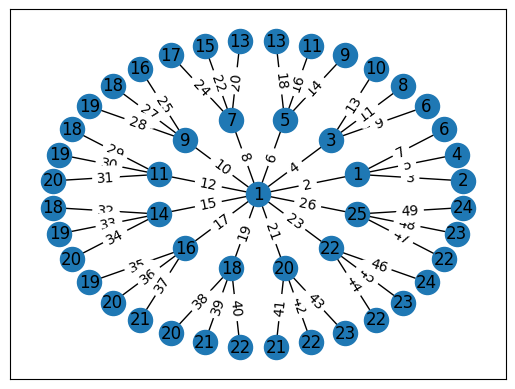

In [ ]:
star_4_graph = label_star(12,4)
visualize(star_4_graph)

In [ ]:
def visualize(graph): # Note that this method does not CREATE nor STORE the below graphs, it just vizualizes them
  root = 0 # Set the root as node as unique ID 0, we don't technically have to do this as root will also be present in the provided graph dictionary, but without this we'd need an extra if statement
  visualization = nx.DiGraph() # Initialize the networkx graph object
  visualization.add_node(root) # Add root to the graph object
  node_labels = {0:1} # Initialize a dictionary to track the node labels, with root's label
  edge_labels = {} # Initialize a dictionary to track the edge weights
  vertices=[key for key in graph.keys()] # Create a list of all the provided vertices, which we're doing so that we can slice and skip the first vertex (root)
  for vertex in vertices[1:]: # For each remaining vertex
    if len(graph[vertex]['nodes']) > 1: # If the node has more than one children (is an internal node).  PLEASE NOTE: THIS MEANS THIS METHOD WILL NOT WORK UNLESS n IS > 2 (it will not work on stars with only one parent and one child)
      visualization.add_node(vertex) # Add the node to the graph obejct
      visualization.add_edge(root,vertex) # Add the edge between this node and root to the graph object
      node_labels[vertex] = graph[vertex]['label'] # Add the node's label to the node label dict
      edge_labels[(root,vertex)] = graph[root]['nodes'][vertex] # Add the edge weight between this node and root to the edge label dict
      parent = vertex # Since the graph dict was made with preorder traversal, the order is always: parent1 -> child1 -> child2 -> ... childN -> parent2 -> child1 -> ... and so on, so for the next set of nodes that don't have any children (are leaf nodes), their parent is the internal node we just labelled
    elif len(graph[vertex]['nodes']) > 0: # If the node has exactly 1 child (aka, is one of the snowflakes in question 3 where the children each have one neighbor, this has no impact on the amalgamated stars but IS the reason why this won't work if n <= 2)
      visualization.add_node(vertex) # Add the node to the graph obejct
      visualization.add_edge(parent,vertex) # Add the edge between this node and parent to the graph object
      visualization.add_edge(vertex-1,vertex) # Add the edge between this node and its neighbor to the graph object (again, please note that this doesn't impact the amalgamated stars, only snowflakes)
      node_labels[vertex] = graph[vertex]['label'] # Add the node's label to the node label dict
      edge_labels[(parent,vertex)] = graph[parent]['nodes'][vertex] # Add the edge weight between this node and its parent to the edge label dict
      edge_labels[(vertex-1,vertex)] = graph[vertex]['nodes'][vertex-1] # Add the edge weight between this node and its neighbor to the edge label dict
    else: # If the node has no children (is a leaf of an amalgamated star or is the first child node in a snowflake)
      visualization.add_node(vertex) # Add the node to the graph obejct
      visualization.add_edge(parent,vertex) # Add the edge between this node and parent to the graph object
      node_labels[vertex] = graph[vertex]['label'] # Add the node's label to the node label dict
      edge_labels[(parent,vertex)] = graph[parent]['nodes'][vertex] # Add the edge weight between this node and its parent to the edge label dict
  pos = nx.nx_pydot.graphviz_layout(visualization,prog='twopi') # Define the positioning algorithm to use for the display (in this case, graphviz's twopi)
  nx.draw_networkx(visualization, pos, with_labels=False, arrowstyle='-') # Draw the base graph
  nx.draw_networkx_labels(visualization, pos, labels=node_labels) # Add node labels to the graph
  nx.draw_networkx_edge_labels(visualization, pos, edge_labels=edge_labels) # Add edge labels/weights to the graph
  pass

In [ ]:
def label_snowflake(centroids,nodes,k=None):
  graph = generate_snowflake(centroids,nodes) # Generate a graph | Should this be counted for complexity?
  if k is None: # If no k was passed (defaults to None): | O(1)
    order = (centroids * nodes + 1) # | O(1)
    k = math.ceil(order/2) # We're using the optimal k for amalgamated stars as our "lower bound", because these graphs are identical aside from having more edges, so they should be >= the amalgamated stars k.  BUT: this doesn't always hold true | O(1)
  else: # | O(1)
    k += 1 # If a k is passed manually (if the method recurs), try again but increase the k by 1 | O(1)
  print(f'Current k value: {k}') # | This is informational, should this be counted for complexity?
  root = 1 # Set the root label | O(1)
  i = 0 # Set a counter to be used to track the internal nodes | O(1)
  internal_weights = [] # Set an array to track the weights between root and the internal nodes (this just simplifies the comparison below in the leaf nodes, but isn't strictly needed) | O(1)
  for centroid in range(0,centroids): # For each internal node | noting that m = stars and n = nodes, O(m)
    internal_weights.append(math.floor((1+((k-1)/(centroids-1))*centroid))+root) # Calculate the list of the internal weights, but do NOT apply them, this is just for comparison below (so isn't strictly needed) | O(m)
  vertices=[key for key in graph.keys()] # Define a list of the vertices (we're doing this so that we can skip vertex 0, aka the root node) | O(m*n)
  try: # We're using a try/excpt to "backtrack", that is: to kill any recurrances that are not valid | O(1)
    for vertex in vertices[1:]: # For all vertices except root: | O(m*n)
      if len(graph[vertex]['nodes']) > 1: # If the node has more than one child, aka is an internal node (PLEASE NOTE: LIKE ABOVE THIS WILL ONLY WORK IF n > 2) | O(m)
        graph[vertex]['label'] = (internal_weights[i] - root) # Set the label of the node based on the weight recorded in the internal_weights array (we could just do the math again, but since we already have the results, why not use them?) | O(m)
        graph[0]['nodes'][vertex] = internal_weights[i] # Set the weight of the edge in the parent of the parent node, aka root | O(m)
        i += 1 # Increase i | O(m)
        parent = vertex # Since the graph dict was made with preorder traversal, the order is always: parent1 -> child1 -> child2 -> ... childN -> parent2 -> child1 -> ... and so on, so for the next set of nodes that don't have any children (are leaf nodes), their parent is the internal node we just labelled | O(m)
      else: # If the node doesn't have more than one child (it's a child node): | O((m*n)-m) (We hit this for all nodes except the parent nodes)
        for label in range (1,k+2): # Starting at 1, check each label until we hit k+2 | O(((m*n)-m)(k+1)) (Due to the below if statement, we can never hit k+2, but python needs the limit to be set at k+2)
          if label == k+1: # However, if we hit label k+1, then: | O(1) (this can only happen a single time per recurrance, in the worst case)
            raise ValueError('Exceeded label range') # If we get to a leaf label that is greater than k, this recurrance becomes invalid so this error will force the method to recur | O(1)
          weight = label + graph[parent]['label'] # If we're still <= k, then calculate the weight of the edge between this node and its parent | O(((m*n)-m)(k))
          weights = [list(graph[x]['nodes'].values()) for x in graph.keys()] # Get a list of all the weights currently stored in the graph dict | O(((m*n)-m)(k)(m*n)) (this assignment includes a Python iteration of all weights stored in the graph dictionary, which at worst case is m*n weights)
          if any(weight in x for x in weights) != True and (weight in internal_weights) != True: # If the calculated weight ISN'T in the graph dict and in the internal_weights array (please note that the weights in the latter may not be set yet, that's why they're kept separately): | O(((m*n)-m)(k)(m*n)) (this if statement actually contains Python searches, which have an average performance of O(len(list))
            if len(graph[vertex]['nodes']) > 0: # If this child node has any neighbors: | O(((m*n)-m)(k))
              neighbor_weight = (label + graph[vertex-1]['label']) # Calculate the edge weight between this node and its neighbor | O(((m*(n-1))-m)(k)) (out of all the children nodes, exactly 1 will not meet this criteria)
              if any(neighbor_weight in x for x in weights) != True and (neighbor_weight != weight) and (neighbor_weight in internal_weights) != True: # If the calculated weight ALSO isn't in the set list of weights or in the internal_weights array: | O(((m*(n-1))-m)(k)(m*n)) (this if statement actually contains Python searches, which have an average performance of O(len(list))
                graph[parent]['nodes'][vertex] = weight # Then we set the edge weight between this node and its parent in the parent | O(((m*(n-1))-m)(k))
                graph[vertex]['label'] = label # Set the label of the node | O(((m*(n-1))-m)(k))
                graph[vertex]['nodes'][vertex-1] = neighbor_weight # And finally, set the edge weight between this node and its neighbor | O(((m*(n-1))-m)(k))
                break # And kill the inner label for loop, so that the outer loop will move on to the next node | O(((m*(n-1))-m) (this can only happen once per outer loop)
            else: # If this is a child node that doesn't have any neighbors, we don't need to check neighbor weights, so: | O(m*k) (This will only be hit for 1 child node per m, up to k times)
              graph[parent]['nodes'][vertex] = weight # Set the weight of the edge in the parent node's edges | O(m*k)
              graph[vertex]['label'] = label # Set the label of the node | O(m*k)
              break # And kill the inner label for loop, so that the outer loop will move on to the next node | O(m) (this can only happen once per outer loop)
  except: # This is where the ValueError takes us, this will not trigger if no error is raised | O(1) (this can happen at most once per recurrance)
    del graph # Since each iteration makes a new graph, if the current run fails, delete the graph so that we're not taking up unnecessary space | O(1)
    graph = label_snowflake(centroids,nodes,k=k) # Recur the function, passing in a k so that it gets increased by 1 on the next run | O(infinity) (there is no limit to how many times this can recur)
  return graph # Return the labelled graph | O(1)

Current k value: 1
Current k value: 2
Current k value: 3
Current k value: 4
Current k value: 5
Current k value: 6
Current k value: 7
Current k value: 8
Current k value: 9
Current k value: 10
Current k value: 11
Current k value: 12
Current k value: 13
Current k value: 14
Current k value: 15
Current k value: 16
Current k value: 17
Current k value: 18
Current k value: 19
Current k value: 20
Current k value: 21
Current k value: 22
Current k value: 23
Current k value: 24
Current k value: 25
Current k value: 26
Current k value: 27
Current k value: 28
Current k value: 29


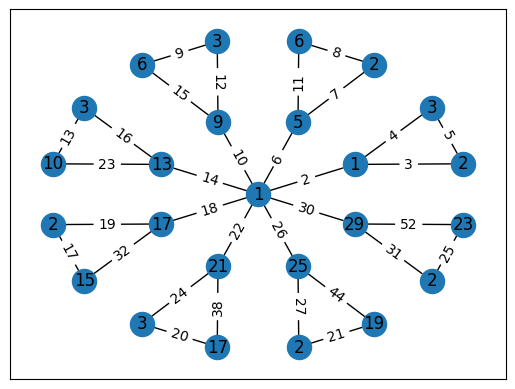

In [ ]:
snowflake_graph = label_snowflake(8,3,k=0)
visualize(snowflake_graph)

In [ ]:
def label_snowflake(centroids,nodes,k=None):
  graph = np.zeros(((centroids*nodes+1),(centroids*nodes+2)))
  columns = np.arange(0,(centroids*nodes+1))
  columns = list(columns)
  columns.append('Label')
  graph = pd.DataFrame(graph,columns=columns)
  graph = graph.astype(int)
  order = (centroids * nodes) + centroids + 1
  vertex = 1
  if k is None: # If no k was passed (defaults to None): | O(1)
    k = math.ceil(order/2)
  else: # | O(1)
    k += 1 # If a k is passed manually (if the method recurs), try again but increase the k by 1 | O(1)
  print(f'Current k value: {k}') # | This is informational, should this be counted for complexity?
  root = 1 # Set the root label | O(1)
  graph['Label'][0] = root
  #for internal in range(0,centroids):
  #  graph[vertex][0] = root + (k - internal)
  #  graph['Label'][vertex] = k - internal
  #  vertex += 1
  diff = (k-1)/(centroids-1)
  for i in range(0,centroids):
    graph[vertex][0] = math.floor(k-diff*i + root)
    graph['Label'][vertex] = math.floor(k-diff*i)
    vertex += 1
  try: # We're using a try/excpt to "backtrack", that is: to kill any recurrances that are not valid | O(1)
    for parent in range(1,centroids+1):
      for leaf in range(1,nodes):
        weights = graph.drop('Label', axis=1)
        for label in range(1, k+2):
          if label == k+1:
            raise ValueError('Exceeded label range') # If we get to a leaf label that is greater than k, this recurrance becomes invalid so this error will force the method to recur | O(1)
          elif leaf == 1:
            weight = graph['Label'][parent] + label
            if not weights.isin([weight]).any().any():
              graph[vertex][parent] = graph['Label'][parent] + label
              graph['Label'][vertex] = label
              vertex += 1
              break
          else:
            weight = graph['Label'][parent] + label
            neighbor_weight = graph['Label'][vertex-1] + label
            if not (weights.isin([weight]).any().any()) and not (weights.isin([neighbor_weight]).any().any()) and (weight != neighbor_weight):
              graph[vertex][parent] = weight
              graph[vertex-1][vertex] = neighbor_weight
              graph['Label'][vertex] = label
              vertex += 1
              break
  except: # This is where the ValueError takes us, this will not trigger if no error is raised | O(1) (this can happen at most once per recurrance)
    del graph # Since each iteration makes a new graph, if the current run fails, delete the graph so that we're not taking up unnecessary space | O(1)
    graph = label_snowflake(centroids,nodes,k=k) # Recur the function, passing in a k so that it gets increased by 1 on the next run | O(infinity) (there is no limit to how many times this can recur)
    #print("It died")
    #return graph
  return graph # Return the labelled graph | O(1)

Current k value: 1
Current k value: 2
Current k value: 3
Current k value: 4
Current k value: 5
Current k value: 6
Current k value: 7
Current k value: 8
Current k value: 9
Current k value: 10
Current k value: 11
Current k value: 12
Current k value: 13
Current k value: 14
Current k value: 15
Current k value: 16
Current k value: 17
Current k value: 18
Current k value: 19
Current k value: 20
Current k value: 21
Current k value: 22
Current k value: 23
Current k value: 24
Current k value: 25
Current k value: 26
Current k value: 27
Current k value: 28
Current k value: 29
Current k value: 30
Current k value: 31
Current k value: 32
Current k value: 33
Current k value: 34
Current k value: 35
Current k value: 36
Current k value: 37
Current k value: 38
Current k value: 39
Current k value: 40
Current k value: 41
Current k value: 42
Current k value: 43
Current k value: 44
Current k value: 45
Current k value: 46
Current k value: 47


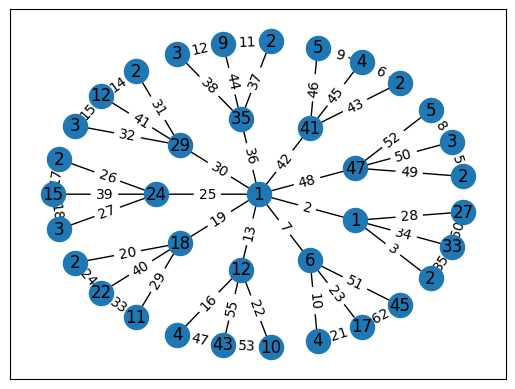

In [ ]:
snowflake_graph = label_snowflake(9,4,k=0)
visualize_dataframe(snowflake_graph)

In [ ]:
def label_dynamic_snowflake(centroids,nodes):
  graph = np.ones(((centroids*nodes+1),(centroids*nodes+2))) * np.inf
  columns = np.arange(0,(centroids*nodes+1))
  columns = list(columns)
  columns.append('Label')
  graph = pd.DataFrame(graph,columns=columns)
  #graph = graph.astype(int)
  root = 1
  vertex = 1
  order = (centroids * nodes) + centroids + 1
  k = order/2
  diff = k/(centroids-1)
  graph['Label'][0] = root
  for i in range(0,centroids):
    graph[vertex][0] = math.floor(1 + diff*i + root)
    graph['Label'][vertex] = math.floor(1 + diff*i)
    vertex += 1
  leftovers = []
  for weight in range(3,1000):
    parent = (math.floor(((vertex-centroids) + (nodes-2))/(nodes-1)))
    weights = graph.drop('Label', axis=1)
    label = weight - graph['Label'][parent]
    if graph[vertex-1][parent] != np.inf:
      neighbor_weight = graph['Label'][vertex-1] + label
      if not (weights.isin([weight]).any().any()):
        if not (weights.isin([neighbor_weight]).any().any()):
          graph[vertex][parent] = weight
          graph['Label'][vertex] = label
          graph[vertex-1][vertex] = neighbor_weight
          vertex += 1
        elif weight < order:
          leftovers.append(weight)
    else:
      if not (weights.isin([weight]).any().any()):
        graph[vertex][parent] = weight
        graph['Label'][vertex] = label
        vertex += 1
    if vertex == centroids*nodes+1:
      break
  if len(leftovers) > 0:
    print(f"Retrying leftover weights: {leftovers}")
    graph = retry_snowflake(centroids,nodes,graph,leftovers)
  print(leftovers)
  return graph

In [ ]:
def retry_snowflake(centroids,nodes,graph,leftovers):
  order = (centroids * nodes) + centroids + 1
  queue = leftovers
  leftovers = []
  for weight in queue:
    for vertex in range((centroids+1),(centroids*nodes+1)):
      parent = (math.floor(((vertex-centroids) + (nodes-2))/(nodes-1)))
      #print(f'Leftover weight: {weight}, current weight for vertex {vertex}: {graph[vertex][parent]}')
      if weight > graph[vertex][parent]:
        weights = graph.drop('Label', axis=1)
        label = weight - graph['Label'][parent]
        if graph[vertex-1][parent] != np.inf:
          neighbor_weight = graph['Label'][vertex-1] + label
        elif graph[vertex+1][parent] != np.inf:
          neighbor_weight = graph['Label'][vertex+1] + label
        if not (weights.isin([weight]).any().any()):
          if not (weights.isin([neighbor_weight]).any().any()):
            temp_weight = graph[vertex][parent]
            print(f"Swapping {temp_weight} with {weight}")
            graph[vertex][parent] = weight
            graph['Label'][vertex] = label
            graph[vertex-1][vertex] = neighbor_weight
            vertex += 1
            if temp_weight < order:
              leftovers.append(temp_weight)
            break
      if vertex == centroids*nodes:
        if weight < order:
          leftovers.append(weight)
        break
  if len(leftovers) > 0:
    print(f"Retrying leftover weights: {leftovers}")
    graph = retry_snowflake(centroids,nodes,graph,leftovers)
  return graph

In [ ]:
def reverse_brute_label_snowflake(centroids,nodes): # STILL BROKEN
  graph = np.zeros(((centroids*nodes+1),(centroids*nodes+2)))
  columns = np.arange(0,(centroids*nodes+1))
  columns = list(columns)
  columns.append('Label')
  graph = pd.DataFrame(graph,columns=columns)
  graph = graph.astype(int)
  root = 1 # Set the root label | O(1)
  graph['Label'][0] = root
  order = (centroids * nodes) + centroids + 1
  k = order/2
  diff = k/(centroids-1)
  vertex = 1
  weights = np.arange(((centroids*nodes+centroids+nodes)),1,-1)
  weights = list(weights)
  for i in range(0,centroids):
    label = math.floor(1 + diff*i)
    graph[vertex][0] = label + root
    graph['Label'][vertex] = label
    weights.remove(label+root)
    vertex += 1
  temp_weights = []
  #print(weights)
  vertex = (centroids * nodes)
  i = 0
  print(weights)
  while weights:
    #print(vertex)
    #print(weights)
    i += 1
    if vertex == centroids or i == 100:
      break
    for weight in weights:
      parent = (math.floor(((vertex-centroids) + (nodes-2))/(nodes-1)))
      if vertex == (centroids * nodes):
        label = weight - graph['Label'][parent]
        graph[vertex][parent] = weight
        graph['Label'][vertex] = label
        weights.remove(weight)
        #print(f"Vertex: {vertex} took label: {label}")
        vertex -= 1
        break
      elif graph[vertex+1][parent] != 0:
        label = weight - graph['Label'][parent]
        neighbor_weight = graph['Label'][vertex+1] + label
        if neighbor_weight in weights and neighbor_weight != weight and label != 0:
          graph[vertex][parent] = weight
          graph[vertex+1][vertex] = neighbor_weight
          graph['Label'][vertex] = label
          weights.remove(weight)
          weights.remove(neighbor_weight)
          #print(f"Vertex: {vertex} took label: {label}")
          vertex -= 1
          break
      else:
        label = weight - graph['Label'][parent]
        graph[vertex][parent] = weight
        graph['Label'][vertex] = label
        weights.remove(weight)
        print(f"Vertex: {vertex} with parent {parent} took label {label} and weight {weight}")
        vertex -= 1
        break
  return graph

In [ ]:
def simple_label_snowflake(centroids,nodes):
  graph = np.zeros(((centroids*nodes+1),(centroids*nodes+2)))
  columns = np.arange(0,(centroids*nodes+1))
  columns = list(columns)
  columns.append('Label')
  graph = pd.DataFrame(graph,columns=columns)
  graph = graph.astype(int)
  root = 1 # Set the root label | O(1)
  graph['Label'][0] = root
  vertex = 1
  weight = 2
  for parent in range(1,centroids+1):
    graph[vertex][0] = weight
    graph['Label'][vertex] = weight - graph['Label'][0]
    weight += 1
    parent = vertex
    vertex += 1
    for leaf in range(1,nodes):
        if leaf == 1:
          graph[vertex][parent] = weight
          graph['Label'][vertex] =  weight - graph['Label'][parent]
          weight += 1
        else:
          neighbor_weight = weight + 1
          graph[vertex][parent] = weight
          graph[vertex-1][vertex] = neighbor_weight
          graph['Label'][vertex] = weight - graph['Label'][parent]
          weight += 2
        vertex += 1
  return graph # Return the labelled graph | O(1)

In [ ]:
def label_snowflake(centroids,nodes): # Still gives at least order + 2, but works better at smaller m and n than below (is also much less complex)
  graph = np.zeros(((centroids*nodes+1),(centroids*nodes+2)))
  columns = np.arange(0,(centroids*nodes+1))
  columns = list(columns)
  columns.append('Label')
  graph = pd.DataFrame(graph,columns=columns)
  graph = graph.astype(int)
  root = 1
  vertex = 1
  order = (centroids * nodes) + (centroids * (nodes - 2)) + 1
  k = order/2
  diff = (k)/(centroids-1)
  graph['Label'][0] = root
  for i in range(0,centroids):
    graph[vertex][0] = math.floor(1 + diff*i + root)
    graph['Label'][vertex] = math.floor(1 + diff*i)
    vertex += 1
  for weight in range(3,1000):
    parent = (math.floor(((vertex-centroids) + (nodes-2))/(nodes-1)))
    weights = graph.drop('Label', axis=1)
    label = weight - graph['Label'][parent]
    if graph[vertex-1][parent] != 0:
      neighbor_weight = graph['Label'][vertex-1] + label
      if not (weights.isin([weight]).any().any()) and not (weights.isin([neighbor_weight]).any().any()):
        graph[vertex][parent] = weight
        graph['Label'][vertex] = label
        graph[vertex-1][vertex] = neighbor_weight
        vertex += 1
    else:
      if not (weights.isin([weight]).any().any()):
        graph[vertex][parent] = weight
        graph['Label'][vertex] = label
        vertex += 1
    if vertex == centroids*nodes+1:
      break
  return graph

In [ ]:
def brute_label_snowflake(centroids,nodes): # STILL BROKEN: this is better at largers m and n than above, but worse at smaller m and n
  graph = np.zeros(((centroids*nodes+1),(centroids*nodes+2)))
  columns = np.arange(0,(centroids*nodes+1))
  columns = list(columns)
  columns.append('Label')
  graph = pd.DataFrame(graph,columns=columns)
  graph = graph.astype(int)
  root = 1 # Set the root label | O(1)
  graph['Label'][0] = root
  order = (centroids * nodes) + (centroids * (nodes - 2)) + 1
  k = order/2
  diff = k/(centroids-1)
  vertex = 1
  weights = np.arange(2,((centroids*nodes+centroids)+3))
  weights = list(weights)
  for i in range(0,centroids):
    label = math.floor(1 + diff*i)
    graph[vertex][0] = label + root
    graph['Label'][vertex] = label
    weights.remove(label+root)
    vertex += 1
  temp_weights = []
  i = 0
  while weights:
    if temp_weights == weights:
      weights.append(weights[-1]+1)
    temp_weights = weights.copy()
    i += 1
    if i == 100 or vertex == centroids*nodes+1:
      break
    weight_check = graph.drop('Label', axis=1)
    for weight in weights:
      parent = (math.floor(((vertex-centroids) + (nodes-2))/(nodes-1)))
      label = weight - graph['Label'][parent]
      if label != graph['Label'][parent]:
        if vertex == (centroids*nodes) and not (weight_check.isin([neighbor_weight]).any().any()):
            graph[vertex][parent] = weight
            graph['Label'][vertex] = label
            graph[vertex-1][vertex] = neighbor_weight
            weights.remove(weight)
            vertex += 1
            weight = []
            break
        elif graph[vertex-1][parent] != 0 and not (weight_check.isin([weight]).any().any()):
          neighbor_weight = graph['Label'][vertex-1] + label
          if not (weight_check.isin([neighbor_weight]).any().any()) and neighbor_weight != weight:
            graph[vertex][parent] = weight
            graph['Label'][vertex] = label
            graph[vertex-1][vertex] = neighbor_weight
            weights.remove(weight)
            if neighbor_weight in weights:
              weights.remove(neighbor_weight)
            vertex += 1
            break
        elif not (weight_check.isin([weight]).any().any()):
          graph[vertex][parent] = weight
          graph['Label'][vertex] = label
          weights.remove(weight)
          vertex += 1
          break
  return graph

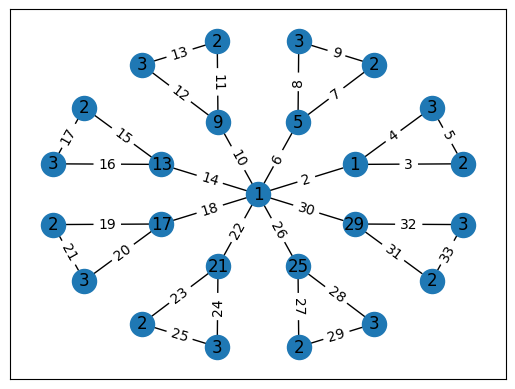

In [ ]:
snowflake_graph = simple_label_snowflake(8,3)
visualize_dataframe(snowflake_graph)

In [336]:
def funky_label_3_snowflake(triangles,nodes): # Still gives at least order + 2, but works better at smaller m and n than below (is also much less complex)
  graph = np.zeros(((triangles*nodes+1),(triangles*nodes+2)))
  columns = np.arange(0,(triangles*nodes+1))
  columns = list(columns)
  columns.append('Label')
  graph = pd.DataFrame(graph,columns=columns)
  graph = graph.astype(int)
  root = 1
  reverse = False
  graph['Label'][0] = root
  order = (triangles * nodes) + (triangles * (nodes - 2))
  k = ((order+1)/2)
  diff = (k/(triangles-1))
  weights = np.arange(2,((triangles*nodes+triangles)+6))
  weights = list(weights)
  vertex = 1
  for i in range(0,triangles):
    label = math.floor(1 + diff*i)
    graph[vertex][0] = label + root
    graph['Label'][vertex] = label
    weights.remove(label+root)
    vertex += 1
  i = 1
  leaf = 1
  reverse_vertex = (triangles*nodes)
  while (vertex < reverse_vertex+1) and (i < 100):
    i += 1
    if reverse == False:
      parent = (math.floor(((vertex-triangles) + (nodes-2))/(nodes-1)))
      for weight in weights:
        label = weight - graph['Label'][parent]
        if leaf == 1 and label != graph['Label'][parent] and label != 0:
          graph['Label'][vertex] = label
          graph[vertex][parent] = weight
          weights.remove(weight)
          leaf += 1
          vertex += 1
          break
        elif leaf == 2 and label != graph['Label'][parent] and label != 0:
          neighbor_weight = graph['Label'][vertex-1] + label
          if neighbor_weight != weight and neighbor_weight in weights:
            graph[vertex][parent] = weight
            graph['Label'][vertex] = label
            graph[vertex-1][vertex] = neighbor_weight
            weights.remove(weight)
            weights.remove(neighbor_weight)
            reverse = True
            vertex += 1
            break
    else:
      parent = (math.floor(((reverse_vertex-triangles) + (nodes-2))/(nodes-1)))
      for weight in reversed(weights):
        label = weight - graph['Label'][parent]
        if leaf == 2 and label != graph['Label'][parent] and label != 0:
          neighbor_weight = weight
          weight -= 1
          label = weight - graph['Label'][parent]
          if label != graph['Label'][parent] and label != 0 and weight in weights and neighbor_weight in weights:
            graph['Label'][reverse_vertex] = label
            graph[reverse_vertex][parent] = weight
            graph[reverse_vertex-1][reverse_vertex] = neighbor_weight
            weights.remove(weight)
            weights.remove(neighbor_weight)
            reverse_vertex -= 1
            leaf -= 1
            break
        elif leaf == 1 and label != graph['Label'][parent] and label != 0:
          label_neighbor = graph[reverse_vertex][reverse_vertex+1] - graph['Label'][reverse_vertex+1]
          if label == label_neighbor:
            neighbor_weight = graph['Label'][reverse_vertex+1] + label
            if neighbor_weight != weight:
              graph['Label'][reverse_vertex] = label
              graph[reverse_vertex][parent] = weight
              weights.remove(weight)
              reverse_vertex -= 1
              reverse = False
              break
  return graph

In [80]:
def funky_label_snowflake(triangles,nodes): # This assumes the smallest value of k is (E(G) + 1)/2)+2, because that's the smallest we could get while testing or by hand
  graph = np.zeros(((triangles*nodes+1),(triangles*nodes+2))) # Create an empty 2d matrix to store the graph, which is one column wider than it is tall (for the Label) | O(1)
  columns = np.arange(0,(triangles*nodes+1)) # Create a list of columns to be used by the dataframe | O(1)
  columns = list(columns) # Convert the column to a list (to get the ability to append, basically, which numpy arrays don't have?) | O(1)
  columns.append('Label') # Append the column Label to the end of the columns list | O(1)
  graph = pd.DataFrame(graph,columns=columns) # Create a dataframe with the matrix and columns | O(1)
  graph = graph.astype(int) # Convert all values in the matrix to integers.  This is not strictly needed, but it helps with visuals. | O(1)
  root = 1 # Set the label of root | O(1)
  reverse = False # Create a counter that tracks which end of the graph the current loop is iterating | O(1)
  graph['Label'][0] = root # Add the root label to the dataframe | O(1)
  order = (triangles * nodes) + (triangles * (nodes - 2))  # Define the order of the graph | O(1)
  largest_internal = (order+1)/2 # Define the label of the largest internal node of the graph, note that we are not calling this "k" because in this algorithm, it isn't | O(1)
  diff = largest_internal/(triangles-1) # Define the difference to increase each internal node by, note that we also do not round yet | O(1)
  weights = np.arange(2,(((triangles * nodes) + (triangles * (nodes - 2)))+6)) # Define an array of weights for the algorithm to choose from. Because it assumes k += 2, the highest weight can be 3 higher than the order. Because of how Python iterates, and how the available weights start at 2, we end up having to add 6 extra weights (to go, for examples, from 2 to 35 in an 8*3 graph) | O(1)
  weights = list(weights) # Convert the numpy array to a list, for simpler operations | O(1)
  vertex = 1 # Set a tracker to count the current vertex | O(1)
  for i in range(0,triangles): # For each triangle | O(triangles+1)
    label = math.floor(1 + diff*i)
    graph[vertex][0] = label + root # Set the weight between it and root by adding the difference, times i, to 1 and the root | O(triangles)
    graph['Label'][vertex] = label # Set the node label adding the difference, times i, to 1 | O(triangles)
    weights.remove(label+root) # Remove the weight from the weights list/array | O(triangles)
    vertex += 1 # Increase the vertex counter | O(triangles)
  leaf = 1 # Set a counter to track the current leaf
  reverse_vertex = (triangles*nodes) # Set a counter to track the last leaf, for iterating in reverse order
  i = 1
  while (vertex < reverse_vertex+1) and (i < 100): # While the forwarding counting iterators and the reverse counting iterators do not match (keeping in mind that we increase/decrease the counters AFTER labeling each node, so we have to have a +1) | O(nodes+1)
    i += 1
    if reverse == False: # If the reverse flag is false, which means this iterations is counting forward | O(nodes/2) PLEASE NOTE: with this design, it can be safely assumed that in MOST cases, the forward and backwards iterations will happen a roughly equal number of times, so for simplicty we're saying each happens 1/2 of the time
      parent = (math.floor(((vertex-triangles) + (nodes-2))/(nodes-1)))
      for weight in weights:
        label = weight - graph['Label'][parent]
        if leaf == 1 and label != graph['Label'][parent]:
          graph['Label'][vertex] = label
          graph[vertex][parent] = weight
          weights.remove(weight)
          leaf += 1
          vertex += 1
          break
        elif leaf != 1 and label != graph['Label'][parent]:
          neighbor_weight = graph['Label'][vertex-1] + label
          if neighbor_weight != weight and neighbor_weight in weights:
            graph[vertex][parent] = weight
            graph['Label'][vertex] = label
            graph[vertex-1][vertex] = neighbor_weight
            weights.remove(weight)
            weights.remove(neighbor_weight)
            vertex += 1
            leaf += 1
            if leaf == nodes:
              reverse = True
            break
    else:
      parent = (math.floor(((reverse_vertex-triangles) + (nodes-2))/(nodes-1)))
      for weight in reversed(weights):
        label = weight - graph['Label'][parent]
        if leaf != 2 and label != graph['Label'][parent]:
          neighbor_weight = weight
          weight -= 1
          label = weight - graph['Label'][parent]
          if label != graph['Label'][parent] and weight in weights and neighbor_weight in weights:
            graph['Label'][reverse_vertex] = label
            graph[reverse_vertex][parent] = weight
            graph[reverse_vertex-1][reverse_vertex] = neighbor_weight
            weights.remove(weight)
            weights.remove(neighbor_weight)
            reverse_vertex -= 1
            leaf -= 1
            break
        elif leaf == 2 and label != graph['Label'][parent]:
          label_neighbor = graph[reverse_vertex][reverse_vertex+1] - graph['Label'][reverse_vertex+1]
          if label == label_neighbor:
            neighbor_weight = graph['Label'][reverse_vertex+1] + label
            if neighbor_weight != weight:
              graph['Label'][reverse_vertex] = label
              graph[reverse_vertex][parent] = weight
              weights.remove(weight)
              reverse_vertex -= 1
              leaf -= 1
              reverse = False
              break
  return graph